<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ExergyAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Exergy analysis
#@markdown Exergy analysis is a thermodynamic analysis technique based on the second law of thermodynamics which provides an alternative and illuminating means of assessing and comparing processes and systems rationally and meaningfully.
%%capture
!pip install neqsim

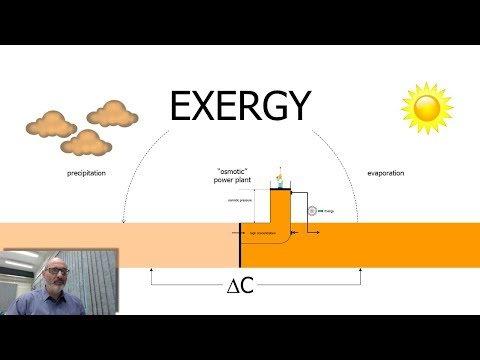

In [0]:
#@title  Exergy Analysis:
#@markdown integrating the 1st and 2nd laws of thermodynamics. https://www.youtube.com/watch?v=cD3nFnzviqA
from IPython.display import YouTubeVideo
YouTubeVideo('cD3nFnzviqA', width=600, height=400)


# Exergy
In thermodynamics, the exergy of a system is the maximum useful work possible during a process that brings the system into equilibrium with a heat reservoir, reaching maximum entropy.[1] When the surroundings are the reservoir, exergy is the potential of a system to cause a change as it achieves equilibrium with its environment. Exergy is the energy that is available to be used. After the system and surroundings reach equilibrium, the exergy is zero. Determining exergy was also the first goal of thermodynamics. The term "exergy" was coined in 1956 by Zoran Rant (1904–1972) by using the Greek ex and ergon meaning "from work"[1][3], but the concept was developed by J. Willard Gibbs in 1873.[4]

Energy is neither created nor destroyed during a process. Energy changes from one form to another (see First Law of Thermodynamics). In contrast, exergy is always destroyed when a process is irreversible, for example loss of heat to the environment (see Second Law of Thermodynamics). This destruction is proportional to the entropy increase of the system together with its surroundings (see Entropy production). The destroyed exergy has been called anergy.[2] For an isothermal process, exergy and energy are interchangeable terms, and there is no anergy.

https://en.wikipedia.org/wiki/Exergy

#Example of Exergy Calculation using NeqSim
THe exergy of a stream can be directly calculated in neasim. THe Exergy is defined as 

$e_x=(h_1 - h_0) - T_0(s_1-s_o)  $

Where $T_0$ is the temperature of the surroundings.

http://www.ivt.ntnu.no/ept/fag/tep4120/innhold/Exergy%20Light%20Version%203.pdf

Carnot efficiency:  0.10567473317129872
T_hot  200.0  T_cold  150.0  C
best Carnot efficiency (1-Tc/Th)  0.10567473317129872


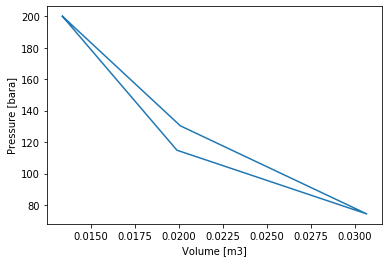

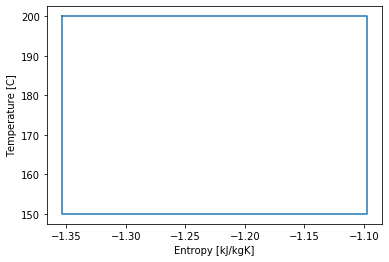

In [0]:
import neqsim
from neqsim.thermo.thermoTools import *

Tsurr = 20.0+273.15 # surrounding temperature in Kelvin

Tgas = 50.0
P_in = 20.0
P_out = 10.0

fluid_1 = fluid("srk")
fluid_1.addComponent("methane", 1.0, "kg/sec")
fluid_1.addComponent("ethane", 0.10, "kg/sec")
fluid_1.setTemperature(Tgas, "C")
fluid_1.setPressure(P_in, "bara")
TPflash(fluid_1)
T1 = fluid_1.getTemperature("C")
H1 = fluid_1.getEnthalpy("kJ/kg")
U1 = fluid_1.getInternalEnergy("kJ/kg")
S1 = fluid_1.getEntropy("kJ/kgK")
V1 = fluid_1.getVolume("m3")
E1 = fluid_1.getExergy(Tsurr, "kJ/kg")


#simulating a throtling process - an isenthalpic process
fluid_1.setPressure(P_out)
PHflash(fluid_1, E1, "kJ/kg")

T2 = fluid_1.getTemperature("C")
H2 = fluid_1.getEnthalpy("kJ/kg")
U2 = fluid_1.getInternalEnergy("kJ/kg")
S2 = fluid_1.getEntropy("kJ/kgK")
V2 = fluid_1.getVolume("m3")
E2 = fluid_1.getExergy(Tsurr, "kJ/kg")


#Reduction in exergy

redEx = E1-E2

print("Reduction in exergy in valve is ", redEx)


#In an adiabatic expander we will take out work at constant entropy

PSflash(fluid_1, S1, "kJ/kgK")

T3 = fluid_1.getTemperature("C")
H3 = fluid_1.getEnthalpy("kJ/kg")
U3 = fluid_1.getInternalEnergy("kJ/kg")
S3 = fluid_1.getEntropy("kJ/kgK")
V3 = fluid_1.getVolume("m3")
E3 = fluid_1.getExergy(Tsurr, "kJ/kg")

#THe work done will be
work = H1-H3
print("expander work ", work)
#change in exergi is
exChange = E1-E3

print("reduced exergy ",  exChange)